## 1. Importación de las bibliotecas necesarias

In [ ]:
# Instalar geemap package
import subprocess

try:
    import geemap
except ImportError:
    print('Installing geemap ...')
    subprocess.check_call(["python", '-m', 'pip', 'install', 'geemap'])

In [1]:
import numpy as np
import pandas as pd
import rasterio
import glob
import os
import matplotlib.pyplot as plt

## 2. Visualización de las áreas de cobertura de vegetación por Loma

### 2.1 Salvar todas las gráficas en una carpeta

In [9]:
path = r'F:\ConsultoriaPNUD\Data\MapLomas\MOD13Q1_NDVI'
os.chdir(path)
os.getcwd()

'F:\\ConsultoriaPNUD\\Data\\MapLomas\\MOD13Q1_NDVI'

In [10]:
# Lista de la ruta y nombre de las clasificaciones
rlist = glob.glob(path + '/*_CLASS.tif')

In [17]:
%matplotlib inline

# Leer la tabla de nombres de lomas con PANDAS
data = pd.read_csv("F:/ConsultoriaPNUD/Data/CSV/Lomas_Modis.csv", delimiter = ";")
names = data['Nombre'].tolist() # convertir toda el df => df.values.tolist()

for j in np.arange(0, len(names), 1):
    ras = rasterio.open(rlist[j])
    imgArray = ras.read()
    haLomas = np.zeros((21, 3))
    for i in np.arange(0, 21, 1):
        haLomas[i,:][0] = (np.count_nonzero(imgArray[i,:,:] == 1))*((250**2)/10000) # ha
        haLomas[i,:][1] = np.count_nonzero(imgArray[i,:,:] == 2)*((250**2)/10000) # ha
        haLomas[i,:][2] = np.count_nonzero(imgArray[i,:,:] == 3)*((250**2)/10000) # ha
        
    N = 21 # num de anios
    areaLomas = tuple(haLomas[:,0])
    areaNoLomas = tuple(haLomas[:,1])
    areaNubes = tuple(haLomas[:,2])
    al = areaLomas[0]+areaNoLomas[0]+areaNubes[0] # Area total de loma
    ind = np.arange(N)  # the x locations for the groups
    width = 0.7 # the width of the bars: can also be len(x) sequence

    fig, axes = plt.subplots(figsize=(13,8))
    p1 = axes.bar(ind, areaLomas, width, color = 'limegreen', label='Área reverdecida')
    #p2 = ax.bar(ind, areaNoLomas, width, bottom=areaLomas, color = 'b', label='Women')
    p3 = axes.bar(ind, areaNubes, width, bottom=areaLomas, color = 'royalblue', label='Cobertura de Nubes')
    axes.axhline(al, xmin=0.4, xmax=0.6, color='grey', linewidth=0.8, 
             label='Área de la Loma')
    axes.set_ylabel('Área (ha)')
    axes.set_title('Área de la Loma: '+names[j].replace("_", " "))
    axes.set_xticks(ind)
    axes.set_xticklabels(('2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007','2008','2009','2010',
                   '2011','2012','2013','2014','2015','2016','2017','2018','2019','2020'))
    axes.legend(loc='upper left',fontsize=14)
    plt.show()
    plt.savefig('Grafico_'+names[j]+'.png')

Map(bottom=1120685.0, center=[-12.240160663076535, -76.76200436621019], controls=(WidgetControl(options=['posi…

### 2.2 Áreas de las lomas en un solo gráfico

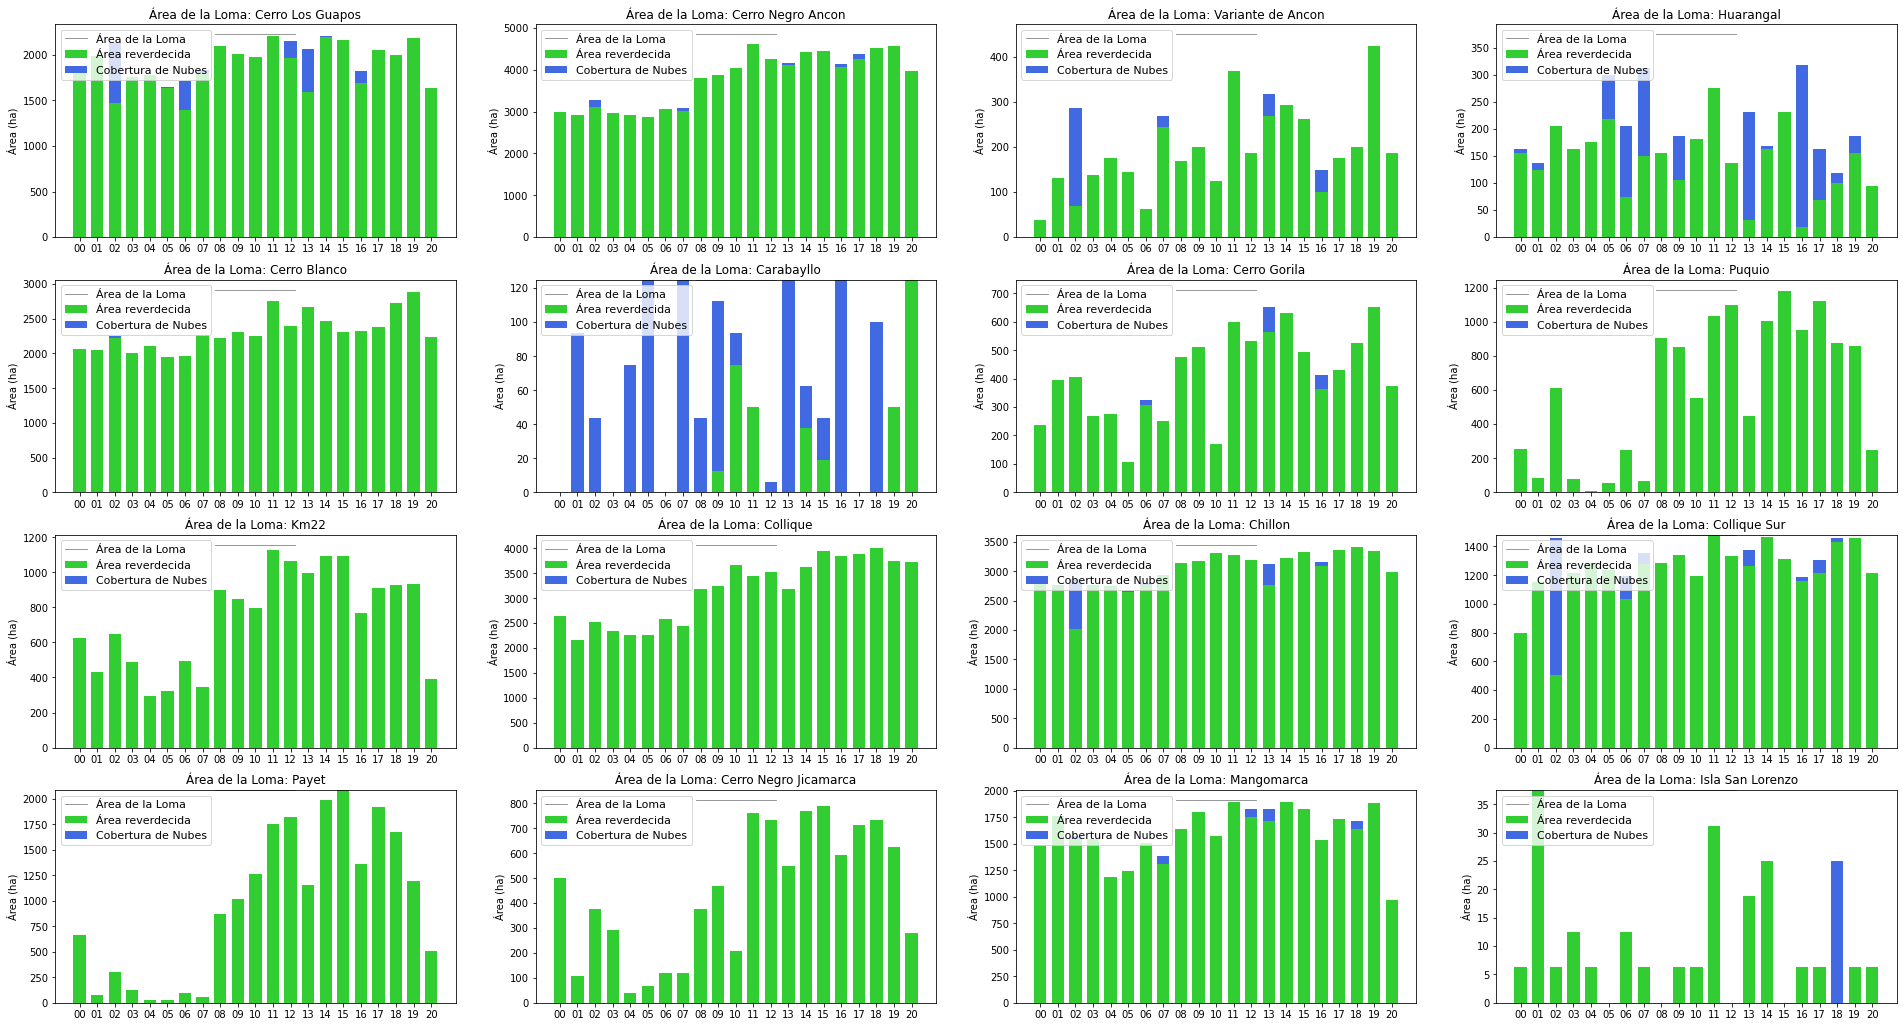

In [48]:
# Leer la tabla de nombres de lomas con PANDAS
data = pd.read_csv("F:/ConsultoriaPNUD/Data/CSV/Lomas_Modis.csv", delimiter = ";")
names = data['Nombre'].tolist() # convertir toda el df => df.values.tolist()

fig = plt.figure(figsize=(33,18))

for j in np.arange(0, 20, 1): # part1: 0,20; part2: 20, 36
    ras = rasterio.open(rlist[j])
    imgArray = ras.read()
    haLomas = np.zeros((21, 3))
    for i in np.arange(0, 21, 1):
        haLomas[i,:][0] = (np.count_nonzero(imgArray[i,:,:] == 1))*((250**2)/10000) # ha
        haLomas[i,:][1] = np.count_nonzero(imgArray[i,:,:] == 2)*((250**2)/10000) # ha
        haLomas[i,:][2] = np.count_nonzero(imgArray[i,:,:] == 3)*((250**2)/10000) # ha
        
    N = 21 # num de anios
    areaLomas = tuple(haLomas[:,0])
    areaNoLomas = tuple(haLomas[:,1])
    areaNubes = tuple(haLomas[:,2])
    al = areaLomas[0]+areaNoLomas[0]+areaNubes[0] # Area total de loma
    ind = np.arange(N)  # the x locations for the groups
    width = 0.7 # the width of the bars: can also be len(x) sequence

    #j = j-20
    axes = fig.add_subplot(4,5,j+1) # 4,4
    p1 = axes.bar(ind, areaLomas, width, color = 'limegreen', label='Área reverdecida')
    #p2 = ax.bar(ind, areaNoLomas, width, bottom=areaLomas, color = 'b', label='Women')
    p3 = axes.bar(ind, areaNubes, width, bottom=areaLomas, color = 'royalblue', label='Cobertura de Nubes')
    axes.axhline(al, xmin=0.4, xmax=0.6, color='grey', linewidth=0.8, 
             label='Área de la Loma')
    axes.set_ylabel('Área (ha)')
    axes.set_title('Área de la Loma: '+names[j].replace("_", " "))
    axes.set_xticks(ind)
    axes.set_xticklabels(('00', '01', '02', '03', '04', '05', '06', '07','08','09','10',
                   '11','12','13','14','15','16','17','18','19','20'))
    axes.legend(loc='upper left',fontsize=11)
    #plt.show()
plt.savefig('Areas_por_loma_UnoSolo_Part2.png')